<a href="https://colab.research.google.com/github/Gus-1003/GeoProcessamento_Estudos_Dados/blob/main/Balan%C3%A7o_H%C3%ADdrico/RepresentantesRegi%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bibliotecas Básicas**

In [ ]:
print("Importando e Instalando Bibliotecas básicas...")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sb
#%matplotlib inline


Importando e Instalando Bibliotecas básicas...


In [ ]:
print("montando google drive...")
from google.colab import drive
drive.mount('/content/drive')

montando google drive...
Mounted at /content/drive


### **Pré - Processamento**
#### Leitura dos dados da produção do RN

In [ ]:
pd_BARRETOS = pd.read_csv('/content/drive/MyDrive/meteorologia/database_tab03/dados_A748_D_2021-01-01_2021-12-31.csv',low_memory=False, encoding='utf-8', delimiter=';', skiprows=10)
pd_GOIANESIA = pd.read_csv('/content/drive/MyDrive/meteorologia/database_tab03/dados_A022_D_2021-01-01_2021-12-31.csv',low_memory=False, encoding='utf-8', delimiter=';', on_bad_lines='skip')
pd_MANAUS = pd.read_csv('/content/drive/MyDrive/meteorologia/database_tab03/dados_A101_D_2021-01-01_2021-12-31.csv',low_memory=False, encoding='utf-8', delimiter=';', on_bad_lines='skip')
pd_MOSSORO = pd.read_csv('/content/drive/MyDrive/meteorologia/database_tab03/dados_A318_D_2021-01-01_2021-12-31.csv',low_memory=False, encoding='utf-8', delimiter=';', on_bad_lines='skip')
pd_CHAPECO = pd.read_csv('/content/drive/MyDrive/meteorologia/database_tab03/dados_A895_D_2021-01-01_2021-12-31.csv',low_memory=False, encoding='utf-8', delimiter=';', on_bad_lines='skip')

In [ ]:
pd_BARRETOS

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)",Unnamed: 4
0,2021-01-01,3,"30,4","19,3",NaN
1,2021-01-02,"13,4","30,5","18,6",NaN
2,2021-01-03,0,"32,5","18,2",NaN
3,2021-01-04,",2",32,"17,1",NaN
4,2021-01-05,0,32,"19,8",NaN
...,...,...,...,...,...
360,2021-12-27,0,"34,5","17,8",NaN
361,2021-12-28,0,"34,2","18,6",NaN
362,2021-12-29,0,"31,4","19,1",NaN
363,2021-12-30,"18,8","27,7","19,7",NaN


In [ ]:
pd_BARRETOS.pop('Unnamed: 4')
pd_BARRETOS

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)"
0,2021-01-01,3,"30,4","19,3"
1,2021-01-02,"13,4","30,5","18,6"
2,2021-01-03,0,"32,5","18,2"
3,2021-01-04,",2",32,"17,1"
4,2021-01-05,0,32,"19,8"
...,...,...,...,...
360,2021-12-27,0,"34,5","17,8"
361,2021-12-28,0,"34,2","18,6"
362,2021-12-29,0,"31,4","19,1"
363,2021-12-30,"18,8","27,7","19,7"


In [ ]:
# Verifica se tem NaN na database_inmet
hasNan = pd_BARRETOS.isnull().values.any() 
print(hasNan)

True


In [ ]:
# Substituir NaN por ZEROS
pd_BARRETOS = pd_BARRETOS.fillna(0)

In [ ]:
# Verifica se tem NaN na database_inmet
hasNan = pd_BARRETOS.isnull().values.any() 
print(hasNan)

False


In [ ]:
pd_BARRETOS

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)"
0,2021-01-01,3,"30,4","19,3"
1,2021-01-02,"13,4","30,5","18,6"
2,2021-01-03,0,"32,5","18,2"
3,2021-01-04,",2",32,"17,1"
4,2021-01-05,0,32,"19,8"
...,...,...,...,...
360,2021-12-27,0,"34,5","17,8"
361,2021-12-28,0,"34,2","18,6"
362,2021-12-29,0,"31,4","19,1"
363,2021-12-30,"18,8","27,7","19,7"


In [ ]:
# eliminando linhas com NaN(Campos em Branco)
pd_BARRETOS = pd_BARRETOS.dropna() 

In [ ]:
# Verifica se tem NaN na database_inmet
hasNan = pd_BARRETOS.isnull().values.any() 
print(hasNan)


False


In [ ]:
pd_BARRETOS

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)",Unnamed: 4


In [ ]:
teste = pd_BARRETOS.reindex(columns=['Nome: BARRETOS'])
teste

,Nome: BARRETOS
0,Codigo Estacao: A748
1,Latitude: -20.55916666
2,Longitude: -48.54499999
3,Altitude: 534.36
4,Situacao: Operante
5,Data Inicial: 2021-01-01
6,Data Final: 2021-12-31
7,Periodicidade da Medicao: Diaria


In [ ]:
pd_GOIANESIA

,Nome: GOIANESIA
0,Codigo Estacao: A022
1,Latitude: -15.22027777
2,Longitude: -48.98999999
3,Altitude: 667.01
4,Situacao: Operante
5,Data Inicial: 2021-01-01
6,Data Final: 2021-12-31
7,Periodicidade da Medicao: Diaria


In [ ]:
pd_MOSSORO

,Nome: MOSSORO
0,Codigo Estacao: A318
1,Latitude: -4.90416666
2,Longitude: -37.36694443
3,Altitude: 29.44
4,Situacao: Pane
5,Data Inicial: 2021-01-01
6,Data Final: 2021-12-31
7,Periodicidade da Medicao: Diaria


In [ ]:
pd_CHAPECO

,Nome: CHAPECO
0,Codigo Estacao: A895
1,Latitude: -27.0853111
2,Longitude: -52.6357111
3,Altitude: 679
4,Situacao: Operante
5,Data Inicial: 2021-01-01
6,Data Final: 2021-12-31
7,Periodicidade da Medicao: Diaria


In [ ]:
pd_MANAUS

,Nome: MANAUS
0,Codigo Estacao: A101
1,Latitude: -3.10333333
2,Longitude: -60.01638888
3,Altitude: 61.25
4,Situacao: Operante
5,Data Inicial: 2021-01-01
6,Data Final: 2021-12-31
7,Periodicidade da Medicao: Diaria


In [ ]:
print("Renomeando Colunas")
pd_ibge_mesoregiao.set_axis(['Ano', 'NM_MICRO', 'Produto', 'Toneladas'], axis='columns', inplace=True)
pd_ibge_mesoregiao.head(10)

Renomeando Colunas


,Ano,NM_MICRO,Produto,Toneladas
0,2020,Mossoró (RN),Feijão (em grão),5126
1,2020,Chapada do Apodi (RN),Feijão (em grão),1294
2,2020,Médio Oeste (RN),Feijão (em grão),553
3,2020,Vale do Açu (RN),Feijão (em grão),1714
4,2020,Serra de São Miguel (RN),Feijão (em grão),895
5,2020,Pau dos Ferros (RN),Feijão (em grão),2578
6,2020,Umarizal (RN),Feijão (em grão),1123
7,2020,Macau (RN),Feijão (em grão),629
8,2020,Angicos (RN),Feijão (em grão),722
9,2020,Serra de Santana (RN),Feijão (em grão),1908


In [ ]:
print("Limpando o shapefile e selecionando as colunas para plotagem")
#shapefile = shapefile.set_axis(['CD_MICRO', 'Cidade', 'SIGLA', 'geometry'])
shapefile = shapefile[['NM_MICRO', 'geometry']]
shapefile

Limpando o shapefile e selecionando as colunas para plotagem


,NM_MICRO,geometry
0,Mossoró,"MULTIPOLYGON (((-37.14513 -4.94994, -37.14384 ..."
1,Chapada do Apodi,"POLYGON ((-37.29754 -5.39570, -37.29948 -5.396..."
2,Médio Oeste,"POLYGON ((-37.13621 -5.57943, -37.10459 -5.656..."
3,Vale do Açu,"POLYGON ((-36.86628 -4.97360, -36.86301 -4.974..."
4,Serra de São Miguel,"POLYGON ((-38.38184 -6.05347, -38.38383 -6.059..."
5,Pau dos Ferros,"POLYGON ((-37.90098 -5.94469, -37.92119 -5.959..."
6,Umarizal,"POLYGON ((-37.64858 -5.94131, -37.59310 -5.981..."
7,Macau,"POLYGON ((-35.97244 -5.04323, -35.97187 -5.043..."
8,Angicos,"POLYGON ((-36.24130 -5.38432, -36.22323 -5.433..."
9,Serra de Santana,"POLYGON ((-36.64588 -5.75801, -36.64398 -5.758..."


In [ ]:
print("Selecionando colunas para o merge")
pd_ibge_mesoregiao = pd_ibge_mesoregiao.iloc[:, [ 3]]
pd_ibge_mesoregiao

Selecionando colunas para o merge


,Toneladas
0,5126
1,1294
2,553
3,1714
4,895
5,2578
6,1123
7,629
8,722
9,1908


In [ ]:
print("mesclando as tabelas")
result = pd.concat([shapefile, pd_ibge_mesoregiao], axis=1, join="inner")
result

mesclando as tabelas


,CD_MICRO,NM_MICRO,SIGLA,geometry,Toneladas
0,24001,Mossoró,RN,"MULTIPOLYGON (((-37.14513 -4.94994, -37.14384 ...",5126
1,24002,Chapada do Apodi,RN,"POLYGON ((-37.29754 -5.39570, -37.29948 -5.396...",1294
2,24003,Médio Oeste,RN,"POLYGON ((-37.13621 -5.57943, -37.10459 -5.656...",553
3,24004,Vale do Açu,RN,"POLYGON ((-36.86628 -4.97360, -36.86301 -4.974...",1714
4,24005,Serra de São Miguel,RN,"POLYGON ((-38.38184 -6.05347, -38.38383 -6.059...",895
5,24006,Pau dos Ferros,RN,"POLYGON ((-37.90098 -5.94469, -37.92119 -5.959...",2578
6,24007,Umarizal,RN,"POLYGON ((-37.64858 -5.94131, -37.59310 -5.981...",1123
7,24008,Macau,RN,"POLYGON ((-35.97244 -5.04323, -35.97187 -5.043...",629
8,24009,Angicos,RN,"POLYGON ((-36.24130 -5.38432, -36.22323 -5.433...",722
9,24010,Serra de Santana,RN,"POLYGON ((-36.64588 -5.75801, -36.64398 -5.758...",1908


#### **O Mapa abaixo exibe a produção da cultara do feijão em grão**

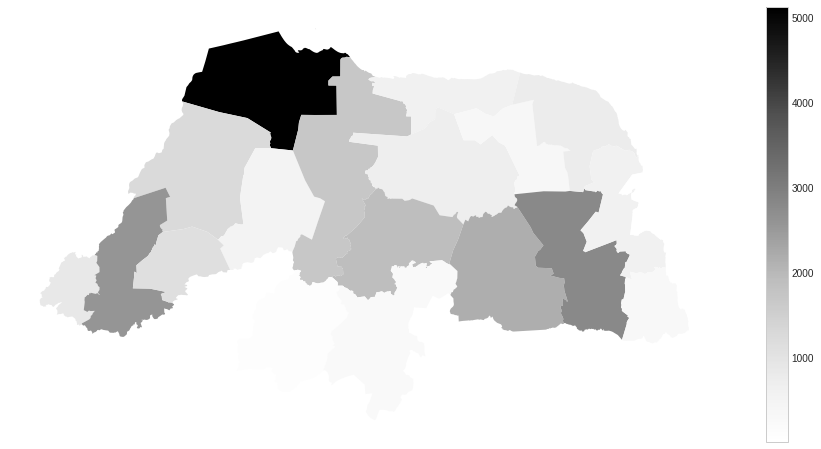

In [ ]:
ax = result.plot(figsize=(16,8), column='Toneladas', legend=True)
ax.set_axis_off();